# **Codificación de Álvaro**



# **Cosas que probar**


*   Descongelar las rotaciones y rularlo
*   Porbar diferentes hiperparámetros
*   Molaría llegar a no utilizar la mutación
*   Probar cualquier cosa que se te ocurra
*   Me encantaría saber hacer el cruce morfológico
*   Conseguir que converja el algoritmo
*   Reducir el max de geeneraciones y de pobalción y que funcione


# **Codificación 1: por prioridad - rotación congelada**

Donde cada gen implica el orden de cada ficha.

Explicación de Álvaro:

$${(p_F,p_I,p_L,p_P,p_N,p_T,p_U,p_V,p_W,p_X,p_Y,p_Z,r_F,r_I,r_L,r_P,r_N,r_T,r_U,r_V,r_W,r_X,r_Y,r_Z)}$$

12 𝗑 2 = 24 enteros.

12 Prioridad y 12 de rotacion.

Las p indican el la prioridad de cada letra.
* Cuanto mayor sea el valor mas prioridad se le da a la ficha de colocarse.
* Pueden tomar cualquier valor real.

Las r van de 0 a 7:
* De 0 a 3 giro pieza normal.
* De 4 a 7 giro de pieza invertida.

Al decodificar se barre de izquierda a derecha y de arriba a abajo seleccionando la ficha con el valor mas alto en su p. Si no puede colocar la ficha, pasa a la siguiente y asi hasta llegar al final de la cola (min(P)). Si no se puede deja hueco en blanco y pasa al siguiente (tambien vuelve a la cabeza de la cola de prioridades).

## **Funciones de las reglas, librerías y gráficos**

### **Librerías y gráficos**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import random
import copy

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

!pip install deap
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install scoop

import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import struct

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

from deap import base, creator, tools, algorithms
import random


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scoop: filename=scoop-0.7.2.0-py3-none-any.whl size=78111 sha256=e0e31ba7982f3bd13b450e2ef473e15d0252830e47b1854fe008fa60b59913e7
  Stored in directory: /root/.cache/pip/wheels/b4/95/9f/547e5cb1209ee0fb17f96b6e9daf1aadd7d3e64eba0005104b
Successfully built scoop


In [ ]:
def plot_evolucion(logs, titulos=None):
    if titulos is None:
        titulos = [''] * len(logs)

    fig, axs = plt.subplots(1, len(logs), figsize=(5 * len(logs), 4), sharex=False)

    if len(logs) == 1:
        axs = [axs]

    for i, log in enumerate(logs):
        gen = log.select("gen")
        fit_mins = log.select("min")
        fit_maxs = log.select("max")
        fit_ave = log.select("avg")

        axs[i].plot(gen, fit_mins, label="Min", color="royalblue", linewidth=2)
        axs[i].plot(gen, fit_maxs, label="Max", color="tomato", linestyle="--", linewidth=2)
        axs[i].plot(gen, fit_ave, label="Avg", color="gray", linestyle=":", linewidth=2)

        axs[i].set_title(titulos[i], fontsize=12)
        axs[i].set_xlabel("Generación", fontsize=11)
        axs[i].set_ylabel("Fitness", fontsize=11)

        margen = (max(fit_maxs) - min(fit_mins)) * 0.05
        axs[i].set_ylim(min(fit_mins) - margen, max(fit_maxs) + margen)

        axs[i].legend(loc="best", fontsize=10)
        axs[i].grid(True)
        axs[i].tick_params(axis='both', labelsize=10)

    plt.tight_layout(pad=2.0)
    plt.savefig("Convergencia_subplot.png", dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

def plot_evolucion_doble(logs, titulos=None):
    if titulos is None:
        titulos = [''] * len(logs)

    # === Gráfico 1: Mínimo ===
    fig_min, axs_min = plt.subplots(1, len(logs), figsize=(5 * len(logs), 4), sharex=False)
    if len(logs) == 1:
        axs_min = [axs_min]

    for i, log in enumerate(logs):
        gen = log.select("gen")
        fit_mins = log.select("min")

        axs_min[i].plot(gen, fit_mins, label="Fitness Mínimo", color="royalblue", linewidth=2)
        axs_min[i].set_title(f"{titulos[i]} - Mínimo", fontsize=12)
        axs_min[i].set_xlabel("Generación", fontsize=11)
        axs_min[i].set_ylabel("Fitness", fontsize=11)

        margen = (max(fit_mins) - min(fit_mins)) * 0.05
        axs_min[i].set_ylim(min(fit_mins) - margen, max(fit_mins) + margen)

        axs_min[i].legend(loc="best", fontsize=10)
        axs_min[i].grid(True)
        axs_min[i].tick_params(axis='both', labelsize=10)

    plt.tight_layout(pad=2.0)
    plt.savefig("Fitness_Minimo.png", dpi=300, bbox_inches='tight')
    plt.show()

    # === Gráfico 2: Media ===
    fig_avg, axs_avg = plt.subplots(1, len(logs), figsize=(5 * len(logs), 4), sharex=False)
    if len(logs) == 1:
        axs_avg = [axs_avg]

    for i, log in enumerate(logs):
        gen = log.select("gen")
        fit_ave = log.select("avg")

        axs_avg[i].plot(gen, fit_ave, label="Fitness Medio", color="darkorange", linestyle="--", linewidth=2)
        axs_avg[i].set_title(f"{titulos[i]} - Media", fontsize=12)
        axs_avg[i].set_xlabel("Generación", fontsize=11)
        axs_avg[i].set_ylabel("Fitness", fontsize=11)

        margen = (max(fit_ave) - min(fit_ave)) * 0.05
        axs_avg[i].set_ylim(min(fit_ave) - margen, max(fit_ave) + margen)

        axs_avg[i].legend(loc="best", fontsize=10)
        axs_avg[i].grid(True)
        axs_avg[i].tick_params(axis='both', labelsize=10)

    plt.tight_layout(pad=2.0)
    plt.savefig("Fitness_Medio.png", dpi=300, bbox_inches='tight')
    plt.show()


In [ ]:
def mostrar_individuo(ind):
    """
    Muestra el tablero generado por un individuo DEAP
    donde:
    - ind es una lista de 12 prioridades
    - las rotaciones están fijadas
    """

    ALTO = 6
    ANCHO = 10
    rota = [0,1,5,0,1,2,3,2,0,0,4,0]

    # Volver a evaluar para obtener el tablero
    grid, piezas_colocadas, huecos = decodificador_random_keys(
        ind, rota, ALTO, ANCHO
    )

    matriz = np.array(grid)
    alto_m, ancho_m = matriz.shape

    cmap_base = plt.cm.tab20
    colores = ["whitesmoke"] + [cmap_base(i) for i in range(12)]
    cmap = mcolors.ListedColormap(colores)
    bounds = np.arange(-1.5, 12.5, 1)
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.imshow(matriz, origin='upper', cmap=cmap, norm=norm)
    ax.set_aspect('equal')

    ax.set_xticks(np.arange(ancho_m) - 0.5, minor=True)
    ax.set_yticks(np.arange(alto_m) - 0.5, minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=1)
    ax.tick_params(which="minor", bottom=False, left=False)
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    for y in range(alto_m):
        for x in range(ancho_m):
            idx = matriz[y][x]
            if idx >= 0:
                ax.text(x, y, PIECE_ORDER[idx], ha="center", va="center", fontweight='bold')

    # fitness REEVALUADO:
    score = -(piezas_colocadas * 5) + (huecos * 10)
    if huecos == 0:
        score = -1000
    if score == 0:
        score = 0.001

    plt.title(f"Fitness: {score:.2f} | Piezas: {piezas_colocadas} | Huecos: {huecos}")
    plt.tight_layout()
    plt.show()


### **Fichas**

In [ ]:
# Rellenar figura
PENTOMINOS_BASE = {
    'F': [(1,0), (1,1), (1,2), (0,1), (2,2)], #0
    'I': [(0,0), (0,1), (0,2), (0,3), (0,4)], #1
    'L': [(0,0), (1,0), (2,0), (3,0), (3,1)], #2
    'P': [(0,0), (0,1), (1,0), (1,1), (2,0)], #3
    'N': [(0,1), (1,1), (2,1), (2,0), (3,0)], #4
    'T': [(0,0), (0,1), (0,2), (1,1), (2,1)], #5
    'U': [(0,0), (0,2), (1,0), (1,1), (1,2)], #6
    'V': [(0,0), (1,0), (2,0), (2,1), (2,2)], #7
    'W': [(0,0), (1,0), (1,1), (2,1), (2,2)], #8
    'X': [(1,0), (0,1), (1,1), (2,1), (1,2)], #9
    'Y': [(0,1), (1,0), (1,1), (1,2), (1,3)], #10
    'Z': [(0,0), (0,1), (1,1), (2,1), (2,2)]  #11
}
PIECE_ORDER = list(PENTOMINOS_BASE.keys())

# Este código sirve apra calcualr rotaciones y espejo (y cuales son iguales)
def generar_variantes(coords):
    variantes = []
    def normalizar(c):
        min_y = min(p[0] for p in c)
        min_x = min(p[1] for p in c)
        return [(y - min_y, x - min_x) for y, x in c]

    actual = coords
    for _ in range(4):
        variantes.append(normalizar(actual))
        actual = [(x, -y) for y, x in actual]
    espejo = [(-y, x) for y, x in coords]
    actual = espejo
    for _ in range(4):
        variantes.append(normalizar(actual))
        actual = [(x, -y) for y, x in actual]
    return variantes

TODAS_LAS_FORMAS = []
for k in PIECE_ORDER:
    TODAS_LAS_FORMAS.append(generar_variantes(PENTOMINOS_BASE[k]))


### **Reglas del juego (motor geometrico)**

In [ ]:

"""
Comprueba si una pieza dada (representada por sus coordenadas en 'forma')
puede colocarse en el tablero 'grid' empezando en la posición (x_origen, y_origen).
Verifica que todas las celdas de la pieza quedan dentro de los límites y que
ninguna está ocupada. Devuelve True si la pieza cabe y False en caso contrario.
"""

def cabe(grid, x_origen, y_origen, forma, alto, ancho):
    for dy, dx in forma:
        ny, nx = y_origen + dy, x_origen + dx
        if ny < 0 or ny >= alto or nx < 0 or nx >= ancho:
            return False
        if grid[ny][nx] != -1:
            return False
    return True

"""
Coloca una pieza en el tablero 'grid' en la posición indicada por
(x_origen, y_origen), asignando el valor 'id_val' a todas las celdas que ocupa
la pieza según su forma (lista de coordenadas relativas).
"""


def poner(grid, x_origen, y_origen, forma, id_val):
    for dy, dx in forma:
        grid[y_origen + dy][x_origen + dx] = id_val

"""
Decodifica un individuo usando la técnica Random Keys: ordena las piezas según
sus prioridades (mayor prioridad se intenta colocar antes) y usa la rotación
asignada a cada una. Recorre el tablero celda por celda e intenta colocar cada
pieza disponible en la primera posición válida donde encaje, usando las
funciones 'cabe' y 'poner'. Devuelve el tablero final, el número de piezas
colocadas correctamente y el número de huecos restantes.
"""


def decodificador_random_keys(cromosoma_prioridad, cromosoma_rotacion, alto, ancho):
    """
    Decodifica usando 'Random Keys'.
    cromosoma_prioridad[i]: Float. Cuanto más alto, antes se intenta colocar la pieza i.
    """
    grid = np.full((alto, ancho), -1)

    info_piezas = []
    for id_pieza in range(12):
        prio = cromosoma_prioridad[id_pieza]
        rot = cromosoma_rotacion[id_pieza]
        info_piezas.append((prio, id_pieza, rot))

    info_piezas.sort(key=lambda x: x[0], reverse=True)

    disponibles = []
    for _, id_pieza, rot in info_piezas:
        disponibles.append({'id': id_pieza, 'rot': rot})

    piezas_colocadas = 0

    for y in range(alto):
        for x in range(ancho):
            if not disponibles: break
            if grid[y][x] != -1: continue

            pieza_insertada = False
            indice_eliminar = -1

            for i, pieza in enumerate(disponibles):
                forma = TODAS_LAS_FORMAS[pieza['id']][pieza['rot']]

                # Ajuste de coordenadas relativo a la forma
                encaja = False
                for by, bx in forma:
                    ay, ax = y - by, x - bx
                    if cabe(grid, ax, ay, forma, alto, ancho):
                         poner(grid, ax, ay, forma, pieza['id'])
                         encaja = True
                         break

                if encaja:
                    pieza_insertada = True
                    indice_eliminar = i
                    piezas_colocadas += 1
                    break

            if pieza_insertada:
                disponibles.pop(indice_eliminar)

    huecos = np.sum(grid == -1)
    return grid, piezas_colocadas, huecos

### **Individuo + FO**

- Una lista de prioridades (prioridades) → controla el orden en el que se colocarán piezas (random keys).

- Una lista de rotaciones (rotaciones) → controla la orientación de cada pieza (0 a 7: 4 rotaciones + 4 reflejos).

- Un fitness → calidad de la solución.

- La solución fenotípica → tablero generado, número de piezas colocadas, huecos, etc.

In [ ]:
"""
Inicializa un individuo del algoritmo genético. Genera aleatoriamente las
prioridades (random keys) y las rotaciones de las piezas si no se pasan como
parámetro. Además, prepara los atributos del fenotipo (fitness, tablero,
piezas colocadas y huecos) que se calcularán en la evaluación.
"""
"""
Evalúa el individuo decodificando sus prioridades y rotaciones para generar
un tablero mediante la función decodificador_random_keys. A partir del número
de piezas colocadas y los huecos obtenidos, calcula el fitness final del
individuo según la función de puntuación definida.
"""

"""
Crea y devuelve una copia independiente del individuo, duplicando sus listas
de prioridades y rotaciones y preservando su valor de fitness. Se usa para
evitar referencias compartidas entre individuos durante el algoritmo genético.
"""


'\nCrea y devuelve una copia independiente del individuo, duplicando sus listas\nde prioridades y rotaciones y preservando su valor de fitness. Se usa para\nevitar referencias compartidas entre individuos durante el algoritmo genético.\n'

In [ ]:
'''
class Individuo:
    def __init__(self, prioridades=None, rotaciones=None):
        """
        prioridades: Lista de 12 floats (0.0 a 1.0).
                     El índice 0 siempre corresponde a la pieza 'F'.
                     El índice 1 siempre corresponde a la pieza 'I', etc.
        """
        if prioridades is None:
            # Generamos 12 valores aleatorios entre -12 y 12
            self.prioridades = [random.random()*24-12 for _ in range(12)]
        else:
            self.prioridades = prioridades

        if rotaciones is None:
            self.rotaciones = [random.randint(0, 7) for _ in range(12)]
        else:
            self.rotaciones = rotaciones

        # Propiedades del Fenotipo
        self.fitness = 0
        self.tablero = None
        self.piezas_colocadas = 0
        self.huecos = 0


    def evaluar(self, alto, ancho):
        self.tablero, self.piezas_colocadas, self.huecos = decodificador_random_keys(
            self.prioridades, self.rotaciones, alto, ancho
        )

        # Función de Fitness
        score = self.piezas_colocadas * 100
        score -= self.huecos * 5
        self.fitness = score

    def copiar(self):
        # Importante copiar la lista de floats por valor
        nuevo = Individuo(self.prioridades[:], self.rotaciones[:])
        nuevo.fitness = self.fitness
        return nuevo
  '''

'\nclass Individuo:\n    def __init__(self, prioridades=None, rotaciones=None):\n        """\n        prioridades: Lista de 12 floats (0.0 a 1.0).\n                     El índice 0 siempre corresponde a la pieza \'F\'.\n                     El índice 1 siempre corresponde a la pieza \'I\', etc.\n        """\n        if prioridades is None:\n            # Generamos 12 valores aleatorios entre -12 y 12\n            self.prioridades = [random.random()*24-12 for _ in range(12)]\n        else:\n            self.prioridades = prioridades\n\n        if rotaciones is None:\n            self.rotaciones = [random.randint(0, 7) for _ in range(12)]\n        else:\n            self.rotaciones = rotaciones\n\n        # Propiedades del Fenotipo\n        self.fitness = 0\n        self.tablero = None\n        self.piezas_colocadas = 0\n        self.huecos = 0\n\n\n    def evaluar(self, alto, ancho):\n        self.tablero, self.piezas_colocadas, self.huecos = decodificador_random_keys(\n            self

## **Ciclo evolutivo**

In [ ]:
# Mejor individuo
ALTO = 6
ANCHO = 10
TAMANO_POBLACION = 1000
TAMANO_CROMOSOMA = 12
CXPB, MUTPB, NGEN = 0.9, 0.15, 1000
indpb1 = 0.15
a = 0   #rango minimo del alelo
b = 100 # valor max alelo

#ind = Individuo()
prior = (5,1000,68,900,-3,2,-2.2,800,0,70,850,3.5)
rota = (0,1,5,0,1,2,3,2,0,0,4,0)
#ind.evaluar(ALTO, ANCHO)
#mostrar_individuo(ind)

In [ ]:
def funcion_objetivo(individuo):
    """
    Función objetivo adaptada al problema de colocación de piezas.
    Devuelve un valor a MINIMIZAR, de forma que valores más bajos
    representen mejores soluciones.
    """
    rota = [0,1,5,0,1,2,3,2,0,0,4,0]
    ALTO = 6
    ANCHO = 10

    # 1. Evaluar fenotipo a partir del genotipo
    grid, piezas_colocadas, huecos = decodificador_random_keys(
        individuo,
        rota,
        ALTO,
        ANCHO
    )

    # ---------------------------------------------------------
    # 3. Función objetivo final (a minimización)
    # ---------------------------------------------------------

    # Cuanto más piezas y menos huecos, mejor.
    # Creamos un score que combine ambas cosas:
    score = -(piezas_colocadas * 5) + (huecos * 20)
    if huecos == 0:
        score = -1000

    # Evitar devolver 0 exacto (opcional)
    if score == 0:
        score = 0.001
    return score,


Para crear el algoritmo genético, se llevan a cabo los siguientes pasos:
1. Definición del problema y generación de la población inicial

  1.1 Creación del problema

  1.2 Creación de la plantilla del individuo

  1.3 Crear individuos aleatorios y población inicial


2. Función objetivo
3. Operadores genéticos

  3.1 Operador de cruce

  3.2 Operador de mutación

4. Definición de la selección

In [ ]:
# Utilizando la función deep se crea un tipo de clase llamado FitnessMin
# base.Fitness --> contiene un atributo llamado wegths
# La clase Fitness proporciona funcionalidades básicas para representar
# la aptitud (fitness) de un individuo en un algoritmo evolutivo
# Especifíca los pesos asociados, a cada objeto se le asigna un peso 1.0 +positivo
# Este peso indica que estamos tratando de maximizar el valor de la función de aptitud.

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

In [ ]:
# Crea un nuevo tipo de clase llamado 'Individual'
# Los individuos serán listas
# Especifica que los individuos de esta clase tendrán asociado un objeto de
# tipo "FitnessMax", que has definido previamente. Este objeto de fitness
# determina cómo se evalúa la aptitud (fitness) de un individuo en el contexto
# de un algoritmo evolutivo de maximización.

creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
# Crea una instancia de la clase Toolbox en el módulo deap. Un Toolbox es
# una caja de herramientas que se utiliza para organizar los operadores genéticos
# (como selección, cruzamiento, mutación) y otros componentes necesarios
# para ejecutar un algoritmo evolutivo.

toolbox = base.Toolbox()

In [ ]:
# 1. Definir una función que genere números enteros entre 'a' y 'b'
# Generación de genes (fenotipo dentro del rango)
# toolbox.register(función, aleatorios, restricciones)

toolbox.register("attr_uniform", random.randint, a, b)

In [ ]:
# Probamos y vemos que generamos un número leatorio entre 0 y el límite seleccionado distinto cada vez

toolbox.attr_uniform()

67

In [ ]:
# Generación de inviduos
# toolbox.register(función , función n veces, tipo de dato, función que genera, número de repe)

toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, TAMANO_CROMOSOMA)

In [ ]:
# Ejemplo de la generación de un individuo aleatorio

individuo = toolbox.individual()
#individuo

In [ ]:
# El individuo es una lista que tiene un atributo fitness
# donde se almacena la calidad del mismo, que al principio será
# vacío, porque aun no ha sido evaluado

individuo.fitness.values

()

In [ ]:
# Generación de población
# toolbox.register(función , función n veces, tipo de dato, función que genera, número de repe)

toolbox.register("population", tools.initRepeat, list, toolbox.individual, TAMANO_POBLACION)

In [ ]:
# Ejemplo de creación de una población. Se ve que es
# una lista de 660 filas (una por cada individuo)

poblacion = toolbox.population()
#print(poblacion)

In [ ]:
# Cada individuo tiene 33 componentes = acciones

print(poblacion[0])

[52, 22, 22, 48, 48, 31, 72, 14, 76, 30, 75, 70]


In [ ]:
# Está destinada a acceder a los valores de aptitud (fitness) del
# primer individuo en una población. Ahora vacia no se ha creado nada.

poblacion[0].fitness.values

()

In [ ]:
# Función objetivo
# toolbox.register(función, función que utiliza)

toolbox.register("evaluate", funcion_objetivo)

In [ ]:
# Ejemplo de uso 1

funcion_objetivo(individuo)

(np.int64(465),)

In [ ]:
# Ejemplo de uso 2 --> vemos que da lo mismo

toolbox.evaluate(individuo)

(np.int64(465),)

In [ ]:
# Registrar la operación gnética de cruce por un punto
# Los individuos podrán estar formados por acciones que sean números eneteros o decimales, no afecta
# Siempre que esté en nuestra mano se pondrá enteros como en el caso de los indiviuos y posblación incial, y depsués en la mutación.
# toolbox.register(función, función tipo de cruce)

toolbox.register("mate", tools.cxBlend, alpha=0.5)

In [ ]:
# Registra la operación gnética de mutación
# Distribución normal
# mu = 0 --> media
# sigma = 5 --> desviación estándar
# indpb = 0.1 --> probabilidad de mutar el gen de un individuo (cntrol de cuantos se mutan)
# a --> limite inferior
# b --> limite superior
# Si la prob generada es menor de 0.1 se muta (10%)
# toolbox.register(función, distribución, media, desviación, prob.mutación)

# toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=5, indpb=0.15)
toolbox.register("mutate", tools.mutUniformInt, low=a, up=b, indpb=indpb1)


In [ ]:
# Selección mediante torneo
# La selección de individuos es con remplazo
# toolbox.register(función, tipo de selección (torneo), cantidad de individuos en el torneo)

toolbox.register("select", tools.selTournament, tournsize=3)

**Algoritmo Evolutivo Simple**

Como último paso en la elaboración de nuestro algoritmo es la selección de las variables CXPB, MUTPB, NGEN. Estas tres variables se corresponden con la **Probabilidad de cruce**, la **Probabilidad de mutación**, y el **número de generaciones** a llevar a cabo . Estos conceptos consisten en lo siguiente:
1.  *Probabilidad de Cruce:* Indica la posibilidad de que una pareja pueda llevar a cabo el cruce, esto es, realizar el proceso de recombinación genética del genotipo de ambos padres en la pareja. La probabilidad de cruce es un parametro que se centra en la capacidad de exploración del algoritmo.
2.  *Probabilidad de Mutación:* Indica la posibilidad global de que un individuo en la generación experimente una mutación en cada generación. De esta manera, este parámetro determina una aproximación del porcentaje de individuos que mutarán por generación.La probabilidad de mutación es un parámetro que se centra en la capacidad de explotación del algoritmo.
3.  *Número de generaciones:* Es el número de veces que se aplicará el algoritmo sobre la población, realizando cambios en esta mediante cruces y mutaciones. El número de generaciones busca alcanzar el punto algido en el que el algoritmo nos da el resultado óptimo al problema. Cada generación hecha de más es un coste computacional, por lo que nos interesa obtener el resultado óptimo en el menor número de generaciones posibles.

In [ ]:
# Definimos:
#  CXPB: Probabilidad de Cruce
#  MUTPB: Probabilidad de Mutación
#  NGEN: Número de Generaciones
# Los valores son de prueba para obtener unos resultados preeliminares

# CXPB, MUTPB, NGEN = 0.8,0.2,60
#CXPB, MUTPB, NGEN = 0.9, 0.15, 1000

In [ ]:
#Generamos la Población Inicial

pop = toolbox.population()
print(pop)

[[41, 47, 14, 94, 39, 72, 20, 7, 3, 11, 42, 17], [24, 4, 13, 10, 85, 28, 76, 92, 5, 61, 97, 92], [85, 56, 78, 77, 77, 63, 19, 11, 17, 79, 70, 25], [54, 70, 54, 74, 59, 15, 5, 5, 7, 57, 55, 27], [14, 89, 45, 71, 97, 76, 12, 71, 68, 83, 16, 40], [43, 27, 34, 97, 8, 29, 93, 32, 47, 41, 99, 30], [62, 74, 73, 93, 7, 61, 42, 82, 42, 88, 4, 16], [87, 71, 44, 55, 16, 8, 18, 71, 23, 44, 23, 21], [22, 19, 17, 18, 39, 60, 99, 51, 32, 51, 43, 42], [19, 85, 17, 96, 14, 78, 80, 32, 36, 1, 85, 68], [81, 41, 75, 61, 88, 59, 69, 49, 68, 44, 90, 43], [91, 62, 25, 64, 99, 30, 43, 6, 54, 43, 9, 25], [84, 98, 38, 40, 15, 18, 2, 96, 36, 64, 39, 64], [33, 37, 52, 83, 37, 53, 67, 53, 16, 52, 25, 69], [13, 26, 12, 5, 4, 82, 51, 93, 82, 95, 67, 17], [18, 89, 16, 67, 54, 93, 92, 24, 4, 11, 9, 30], [32, 78, 26, 17, 70, 38, 76, 72, 50, 67, 30, 81], [16, 31, 49, 33, 52, 45, 55, 31, 99, 29, 84, 14], [99, 80, 99, 5, 27, 48, 48, 17, 5, 65, 28, 37], [87, 67, 75, 33, 29, 24, 52, 46, 30, 37, 77, 59], [92, 27, 59, 91, 31,

In [ ]:
# Definimos el objeto hof que almacenará el mejor individuo
# encontrado a lo largo de las generaciones del Algoritmo G.
# En una instancia llamada 'HallOfFame'
# maxsize = 1 --> solo almacenará al mejor individuo
# Se cambia a 3 para guardar lso maximos locales también
# No reemplaza si son iguales

hof = tools.HallOfFame(3)
hof

In [ ]:
# Se confirma que hof está en el momento vacío

print(hof)

[]


In [ ]:
# Definimos un objeto para generar(recopila y almacena datos) las estadísticas de la
# población a lo largo de las generaciones del algoritmo
# lambda --> toma un individuo ind y muestra su valor en FO

stats = tools.Statistics(lambda ind: ind.fitness.values)
print(stats)

In [ ]:
# Cada línea de código registra una estadística particular con su
# correspondiente función para calcular dicha estadística.

stats.register("avg", np.mean) # --> media
stats.register("std", np.std)  # --> desviación
stats.register("min", np.min)  # --> mínimo
stats.register("max", np.max)  # --> máximo

In [ ]:
# loogbook contendrá todo el registro de evolución

logbook = tools.Logbook()

In [ ]:
# Definimos:
#  CXPB: Probabilidad de Cruce
#  MUTPB: Probabilidad de Mutación
#  NGEN: Número de Generaciones
# Los valores son de prueba para obtener unos resultados preeliminares
# CXPB, MUTPB, NGEN = 0.5, 0.2, 20
# Difreencia entre MUTPB e indpb es:
# MUTPB --> Este parámetro controla la probabilidad global de que un individuo
# en la población experimente una operación de mutación en cada generación
# ... Tantos individuos serán mutados
# indpb --> Contexto específico de la operación de mutación de un individuo
# ... Dentro del genotipo la probabilida de que un gen se mute
# pop --> población de individuos en la cual se ejecutará el algoritmo
# verbose --> comenta las jugadas del algoritmo
# eaSimple --> algoritmo evolutivo simple
# logbook -->  info detallada sobre el progreso del algoritmo evolutivo a lo largo de las generaciones

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)

gen	nevals	avg  	std    	min	max
0  	1000  	278.1	68.9811	150	465
1  	910   	262.98	70.297 	45 	465
2  	888   	259.725	69.8842	150	465
3  	932   	261.09 	70.4859	45 	465
4  	888   	253.95 	69.9571	150	465
5  	935   	251.325	71.6601	45 	465
6  	942   	245.55 	70.5847	45 	465
7  	923   	244.08 	70.0582	150	465
8  	895   	243.66 	74.1226	45 	465
9  	924   	240.72 	69.1331	45 	465
10 	917   	239.985	71.2571	45 	465
11 	925   	231.48 	69.4767	45 	465
12 	930   	232.95 	70.4283	45 	465
13 	891   	229.275	69.5679	45 	360
14 	907   	226.335	70.3164	45 	465
15 	904   	223.29 	70.966 	45 	465
16 	927   	222.135	70.0462	45 	465
17 	927   	223.5  	72.8975	45 	465
18 	920   	219.51 	70.1032	45 	465
19 	903   	213    	67.56  	45 	465
20 	917   	208.275	65.9894	45 	465
21 	925   	209.435	76.6244	-1000	465
22 	914   	207.755	76.758 	-1000	465
23 	900   	205.02 	66.0269	45   	465
24 	926   	205.44 	64.4888	45   	465
25 	908   	203.235	64.5516	45   	360
26 	904   	197.145	63.6441	45   	360
27 	919   	20

## **Resultados del AG Simple**

**Convergencia del algoritmo en las etapas**

Una vez implementado un algoritmo genético, es fundamental analizar su comportamiento a lo largo de las generaciones. En esta sección se evalúa la evolución de los valores de fitness mínimos y medios en cada iteración del algoritmo. Este seguimiento permite verificar si el proceso de optimización está progresando adecuadamente hacia soluciones más eficientes o si, por el contrario, ha alcanzado un estancamiento prematuro.

Estudiar la dinámica de convergencia resulta clave para entender la eficiencia del algoritmo, validar su estabilidad y detectar posibles mejoras en los operadores evolutivos o en los parámetros de configuración. Además, esta evaluación permite comparar el desempeño en distintas fases del algoritmo, como la inicialización, la exploración intensiva del espacio de búsqueda y la estabilización final de las soluciones.

Adicionalmente, es relevante observar si la convergencia se produce en pocas o en muchas etapas. Una convergencia temprana puede indicar una rápida eficiencia del algoritmo, pero también el riesgo de caer en óptimos locales. Por otro lado, una convergencia más lenta puede favorecer una mayor exploración del espacio de soluciones, lo que en algunos casos contribuye a encontrar soluciones más robustas, aunque a costa de mayor tiempo computacional. Evaluar este equilibrio es esencial para ajustar correctamente el algoritmo según los objetivos del problema y las restricciones computacionales disponibles.

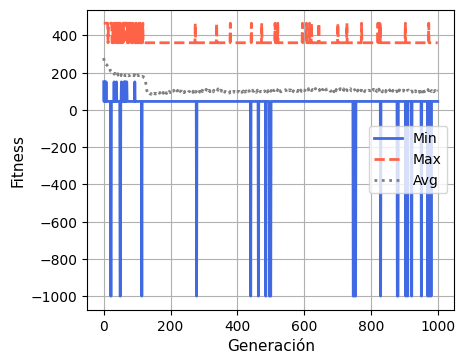

In [ ]:
plot_evolucion([logbook])

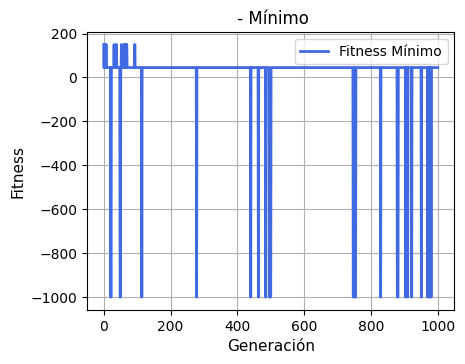

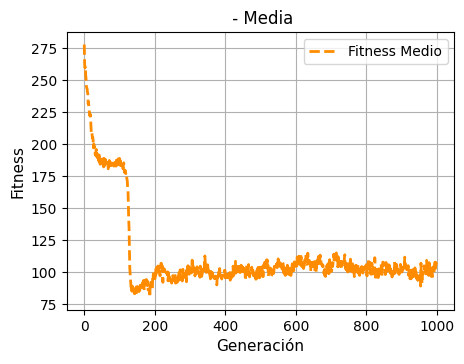

In [ ]:
plot_evolucion_doble([logbook])

**Valor de fitness de los mejores individuos**

Con el objetivo de identificar las soluciones más eficientes obtenidas por el algoritmo genético, se presenta a continuación el conjunto de individuos con mayor rendimiento según la función objetivo. Para ello, se hace uso del objeto hof (Hall of Fame), que almacena los mejores individuos generados durante el proceso evolutivo.

Esta información permite analizar tanto los valores de fitness alcanzados como la composición de los individuos que los obtuvieron. Evaluar estos resultados finales es clave para validar la calidad de la solución optimizada y comprobar si el algoritmo ha sido capaz de encontrar configuraciones cercanas al óptimo global. Además, observar la diversidad entre los mejores individuos puede aportar información sobre la robustez y la estabilidad de la solución obtenida.

In [ ]:
print("Mejor fitness: %f" %hof[0].fitness.values)
print("Mejor individuo %s" %hof[0])
print("Mejor fitness 2: %f" %hof[1].fitness.values)
print("Mejor individuo 2: %s" %hof[1])
print("Mejor fitness 3: %f" %hof[2].fitness.values)
print("Mejor individuo 3: %s" %hof[2])

Mejor fitness: -1000.000000
Mejor individuo [405.44123650280113, 1624.713334031514, 443.38182272181814, 1262.2493412568233, -246.32901056499216, 100.85024324151058, -46.72623383685419, 628.8685339898668, -629.1404879208112, 421.6933392142041, 682.6188584850869, 14.269434998182824]
Mejor fitness 2: -1000.000000
Mejor individuo 2: [75.64202943054596, 487.67943055177545, 87.43131417418523, 272.30993474963213, -207.09378328368012, -2.594759733767958, -20.247648249283735, 169.39338177449403, -56.113418556314166, 86.1687055723139, 194.67829088346986, 70.02351133803558]
Mejor fitness 3: -1000.000000
Mejor individuo 3: [76.68699011587555, 429.0575301686182, 32.4306504439934, 114.95513543544747, -44.89054937897801, 12.935426740537206, 11.562290325239436, 97.04493305534046, -165.05541193513153, 94.32845643296392, 109.3515925313933, 22.990391231121297]


**Visualización de la jugada del pentominó**


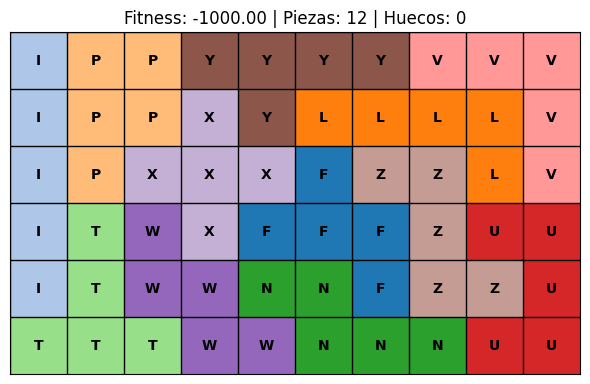

In [ ]:
mostrar_individuo(hof[0])

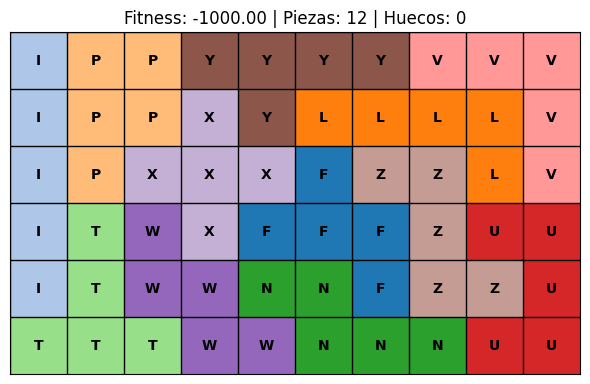

In [ ]:
mostrar_individuo(hof[1])

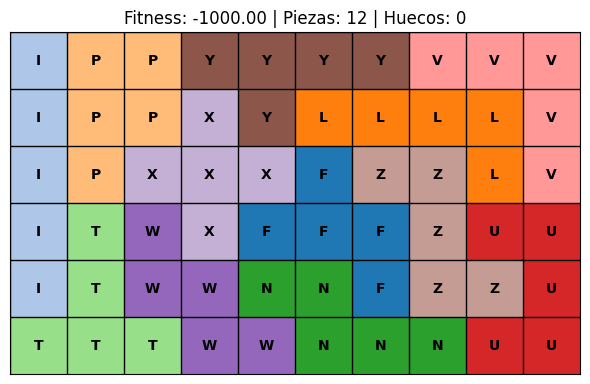

In [ ]:
mostrar_individuo(hof[2])

# **Codificación 1: por prioridad - rotación descongelada**

Donde cada gen implica el orden de cada ficha.

Explicación de Álvaro:

$${(p_F,p_I,p_L,p_P,p_N,p_T,p_U,p_V,p_W,p_X,p_Y,p_Z,r_F,r_I,r_L,r_P,r_N,r_T,r_U,r_V,r_W,r_X,r_Y,r_Z)}$$

12 𝗑 2 = 24 enteros.

12 Prioridad y 12 de rotacion.

Las p indican el la prioridad de cada letra.
* Cuanto mayor sea el valor mas prioridad se le da a la ficha de colocarse.
* Pueden tomar cualquier valor real.

Las r van de 0 a 7:
* De 0 a 3 giro pieza normal.
* De 4 a 7 giro de pieza invertida.

Al decodificar se barre de izquierda a derecha y de arriba a abajo seleccionando la ficha con el valor mas alto en su p. Si no puede colocar la ficha, pasa a la siguiente y asi hasta llegar al final de la cola (min(P)). Si no se puede deja hueco en blanco y pasa al siguiente (tambien vuelve a la cabeza de la cola de prioridades).

## **Funciones de las reglas, librerías y gráficos**

### **Librerías y gráficos**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import random
import copy

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

!pip install deap
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install scoop

import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import struct

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

from deap import base, creator, tools, algorithms
import random


In [ ]:
def sacar_rotaciones(rota):
    """
    Asegura que cada rotación esté en el rango 0–7,
    aplicando módulo 8 a cada posición. No importa si el gen tiene negativos

    Ejemplo:
    [9, -1, 15] → [1, 7, 7]
    """
    return [int(r) % 8 for r in rota]

In [ ]:
def plot_evolucion(logs, titulos=None):
    if titulos is None:
        titulos = [''] * len(logs)

    fig, axs = plt.subplots(1, len(logs), figsize=(5 * len(logs), 4), sharex=False)

    if len(logs) == 1:
        axs = [axs]

    for i, log in enumerate(logs):
        gen = log.select("gen")
        fit_mins = log.select("min")
        fit_maxs = log.select("max")
        fit_ave = log.select("avg")

        axs[i].plot(gen, fit_mins, label="Min", color="royalblue", linewidth=2)
        axs[i].plot(gen, fit_maxs, label="Max", color="tomato", linestyle="--", linewidth=2)
        axs[i].plot(gen, fit_ave, label="Avg", color="gray", linestyle=":", linewidth=2)

        axs[i].set_title(titulos[i], fontsize=12)
        axs[i].set_xlabel("Generación", fontsize=11)
        axs[i].set_ylabel("Fitness", fontsize=11)

        margen = (max(fit_maxs) - min(fit_mins)) * 0.05
        axs[i].set_ylim(min(fit_mins) - margen, max(fit_maxs) + margen)

        axs[i].legend(loc="best", fontsize=10)
        axs[i].grid(True)
        axs[i].tick_params(axis='both', labelsize=10)

    plt.tight_layout(pad=2.0)
    plt.savefig("Convergencia_subplot.png", dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

def plot_evolucion_doble(logs, titulos=None):
    if titulos is None:
        titulos = [''] * len(logs)

    # === Gráfico 1: Mínimo ===
    fig_min, axs_min = plt.subplots(1, len(logs), figsize=(5 * len(logs), 4), sharex=False)
    if len(logs) == 1:
        axs_min = [axs_min]

    for i, log in enumerate(logs):
        gen = log.select("gen")
        fit_mins = log.select("min")

        axs_min[i].plot(gen, fit_mins, label="Fitness Mínimo", color="royalblue", linewidth=2)
        axs_min[i].set_title(f"{titulos[i]} - Mínimo", fontsize=12)
        axs_min[i].set_xlabel("Generación", fontsize=11)
        axs_min[i].set_ylabel("Fitness", fontsize=11)

        margen = (max(fit_mins) - min(fit_mins)) * 0.05
        axs_min[i].set_ylim(min(fit_mins) - margen, max(fit_mins) + margen)

        axs_min[i].legend(loc="best", fontsize=10)
        axs_min[i].grid(True)
        axs_min[i].tick_params(axis='both', labelsize=10)

    plt.tight_layout(pad=2.0)
    plt.savefig("Fitness_Minimo.png", dpi=300, bbox_inches='tight')
    plt.show()

    # === Gráfico 2: Media ===
    fig_avg, axs_avg = plt.subplots(1, len(logs), figsize=(5 * len(logs), 4), sharex=False)
    if len(logs) == 1:
        axs_avg = [axs_avg]

    for i, log in enumerate(logs):
        gen = log.select("gen")
        fit_ave = log.select("avg")

        axs_avg[i].plot(gen, fit_ave, label="Fitness Medio", color="darkorange", linestyle="--", linewidth=2)
        axs_avg[i].set_title(f"{titulos[i]} - Media", fontsize=12)
        axs_avg[i].set_xlabel("Generación", fontsize=11)
        axs_avg[i].set_ylabel("Fitness", fontsize=11)

        margen = (max(fit_ave) - min(fit_ave)) * 0.05
        axs_avg[i].set_ylim(min(fit_ave) - margen, max(fit_ave) + margen)

        axs_avg[i].legend(loc="best", fontsize=10)
        axs_avg[i].grid(True)
        axs_avg[i].tick_params(axis='both', labelsize=10)

    plt.tight_layout(pad=2.0)
    plt.savefig("Fitness_Medio.png", dpi=300, bbox_inches='tight')
    plt.show()


In [ ]:
def mostrar_individuo(ind):
    """
    Individuo de 24 genes:
    - genes 0–11  = prioridades  (pF...pZ)
    - genes 12–23 = rotaciones   (rF...rZ)
    """

    ALTO = 6
    ANCHO = 10
    # Separar prioridades y rotaciones
    prioridad = ind[:12]           # 12 prioridades
    rotacion_sin_norm  = ind[12:]           # 12 rotaciones
    rota = sacar_rotaciones(rotacion_sin_norm)

    # Volver a evaluar para obtener el tablero
    grid, piezas_colocadas, huecos = decodificador_random_keys(
        prioridad, rota, ALTO, ANCHO
    )

    matriz = np.array(grid)
    alto_m, ancho_m = matriz.shape

    cmap_base = plt.cm.tab20
    colores = ["whitesmoke"] + [cmap_base(i) for i in range(12)]
    cmap = mcolors.ListedColormap(colores)
    bounds = np.arange(-1.5, 12.5, 1)
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.imshow(matriz, origin='upper', cmap=cmap, norm=norm)
    ax.set_aspect('equal')

    ax.set_xticks(np.arange(ancho_m) - 0.5, minor=True)
    ax.set_yticks(np.arange(alto_m) - 0.5, minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=1)
    ax.tick_params(which="minor", bottom=False, left=False)
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    for y in range(alto_m):
        for x in range(ancho_m):
            idx = matriz[y][x]
            if idx >= 0:
                ax.text(x, y, PIECE_ORDER[idx], ha="center", va="center", fontweight='bold')

    # fitness REEVALUADO:
    score = 100 - (piezas_colocadas * 5)
    if huecos == 0:
        score = -1000
    if score == 0:
        score = 0.001

    plt.title(f"Fitness: {score:.2f} | Piezas: {piezas_colocadas} | Huecos: {huecos}")
    plt.tight_layout()
    plt.show()


### **Fichas**

In [ ]:
# Rellenar figura
PENTOMINOS_BASE = {
    'F': [(1,0), (1,1), (1,2), (0,1), (2,2)], #0
    'I': [(0,0), (0,1), (0,2), (0,3), (0,4)], #1
    'L': [(0,0), (1,0), (2,0), (3,0), (3,1)], #2
    'P': [(0,0), (0,1), (1,0), (1,1), (2,0)], #3
    'N': [(0,1), (1,1), (2,1), (2,0), (3,0)], #4
    'T': [(0,0), (0,1), (0,2), (1,1), (2,1)], #5
    'U': [(0,0), (0,2), (1,0), (1,1), (1,2)], #6
    'V': [(0,0), (1,0), (2,0), (2,1), (2,2)], #7
    'W': [(0,0), (1,0), (1,1), (2,1), (2,2)], #8
    'X': [(1,0), (0,1), (1,1), (2,1), (1,2)], #9
    'Y': [(0,1), (1,0), (1,1), (1,2), (1,3)], #10
    'Z': [(0,0), (0,1), (1,1), (2,1), (2,2)]  #11
}
PIECE_ORDER = list(PENTOMINOS_BASE.keys())

# Este código sirve apra calcualr rotaciones y espejo (y cuales son iguales)
def generar_variantes(coords):
    variantes = []
    def normalizar(c):
        min_y = min(p[0] for p in c)
        min_x = min(p[1] for p in c)
        return [(y - min_y, x - min_x) for y, x in c]

    actual = coords
    for _ in range(4):
        variantes.append(normalizar(actual))
        actual = [(x, -y) for y, x in actual]
    espejo = [(-y, x) for y, x in coords]
    actual = espejo
    for _ in range(4):
        variantes.append(normalizar(actual))
        actual = [(x, -y) for y, x in actual]
    return variantes

TODAS_LAS_FORMAS = []
for k in PIECE_ORDER:
    TODAS_LAS_FORMAS.append(generar_variantes(PENTOMINOS_BASE[k]))


### **Reglas del juego (motor geometrico)**

In [ ]:

"""
Comprueba si una pieza dada (representada por sus coordenadas en 'forma')
puede colocarse en el tablero 'grid' empezando en la posición (x_origen, y_origen).
Verifica que todas las celdas de la pieza quedan dentro de los límites y que
ninguna está ocupada. Devuelve True si la pieza cabe y False en caso contrario.
"""

def cabe(grid, x_origen, y_origen, forma, alto, ancho):
    for dy, dx in forma:
        ny, nx = y_origen + dy, x_origen + dx
        if ny < 0 or ny >= alto or nx < 0 or nx >= ancho:
            return False
        if grid[ny][nx] != -1:
            return False
    return True

"""
Coloca una pieza en el tablero 'grid' en la posición indicada por
(x_origen, y_origen), asignando el valor 'id_val' a todas las celdas que ocupa
la pieza según su forma (lista de coordenadas relativas).
"""


def poner(grid, x_origen, y_origen, forma, id_val):
    for dy, dx in forma:
        grid[y_origen + dy][x_origen + dx] = id_val

"""
Decodifica un individuo usando la técnica Random Keys: ordena las piezas según
sus prioridades (mayor prioridad se intenta colocar antes) y usa la rotación
asignada a cada una. Recorre el tablero celda por celda e intenta colocar cada
pieza disponible en la primera posición válida donde encaje, usando las
funciones 'cabe' y 'poner'. Devuelve el tablero final, el número de piezas
colocadas correctamente y el número de huecos restantes.
"""


def decodificador_random_keys(cromosoma_prioridad, cromosoma_rotacion, alto, ancho):
    """
    Decodifica usando 'Random Keys'.
    cromosoma_prioridad[i]: Float. Cuanto más alto, antes se intenta colocar la pieza i.
    """
    grid = np.full((alto, ancho), -1)

    info_piezas = []
    for id_pieza in range(12):
        prio = cromosoma_prioridad[id_pieza]
        rot = cromosoma_rotacion[id_pieza]
        info_piezas.append((prio, id_pieza, rot))

    info_piezas.sort(key=lambda x: x[0], reverse=True)

    disponibles = []
    for _, id_pieza, rot in info_piezas:
        disponibles.append({'id': id_pieza, 'rot': rot})

    piezas_colocadas = 0

    for y in range(alto):
        for x in range(ancho):
            if not disponibles: break
            if grid[y][x] != -1: continue

            pieza_insertada = False
            indice_eliminar = -1

            for i, pieza in enumerate(disponibles):
                forma = TODAS_LAS_FORMAS[pieza['id']][pieza['rot']]

                # Ajuste de coordenadas relativo a la forma
                encaja = False
                for by, bx in forma:
                    ay, ax = y - by, x - bx
                    if cabe(grid, ax, ay, forma, alto, ancho):
                         poner(grid, ax, ay, forma, pieza['id'])
                         encaja = True
                         break

                if encaja:
                    pieza_insertada = True
                    indice_eliminar = i
                    piezas_colocadas += 1
                    break

            if pieza_insertada:
                disponibles.pop(indice_eliminar)

    huecos = np.sum(grid == -1)
    return grid, piezas_colocadas, huecos

### **Individuo + FO**

- Una lista de prioridades (prioridades) → controla el orden en el que se colocarán piezas (random keys).

- Una lista de rotaciones (rotaciones) → controla la orientación de cada pieza (0 a 7: 4 rotaciones + 4 reflejos).

- Un fitness → calidad de la solución.

- La solución fenotípica → tablero generado, número de piezas colocadas, huecos, etc.

In [ ]:
"""
Inicializa un individuo del algoritmo genético. Genera aleatoriamente las
prioridades (random keys) y las rotaciones de las piezas si no se pasan como
parámetro. Además, prepara los atributos del fenotipo (fitness, tablero,
piezas colocadas y huecos) que se calcularán en la evaluación.
"""
"""
Evalúa el individuo decodificando sus prioridades y rotaciones para generar
un tablero mediante la función decodificador_random_keys. A partir del número
de piezas colocadas y los huecos obtenidos, calcula el fitness final del
individuo según la función de puntuación definida.
"""

"""
Crea y devuelve una copia independiente del individuo, duplicando sus listas
de prioridades y rotaciones y preservando su valor de fitness. Se usa para
evitar referencias compartidas entre individuos durante el algoritmo genético.
"""


'\nCrea y devuelve una copia independiente del individuo, duplicando sus listas\nde prioridades y rotaciones y preservando su valor de fitness. Se usa para\nevitar referencias compartidas entre individuos durante el algoritmo genético.\n'

In [ ]:
'''
class Individuo:
    def __init__(self, prioridades=None, rotaciones=None):
        """
        prioridades: Lista de 12 floats (0.0 a 1.0).
                     El índice 0 siempre corresponde a la pieza 'F'.
                     El índice 1 siempre corresponde a la pieza 'I', etc.
        """
        if prioridades is None:
            # Generamos 12 valores aleatorios entre -12 y 12
            self.prioridades = [random.random()*24-12 for _ in range(12)]
        else:
            self.prioridades = prioridades

        if rotaciones is None:
            self.rotaciones = [random.randint(0, 7) for _ in range(12)]
        else:
            self.rotaciones = rotaciones

        # Propiedades del Fenotipo
        self.fitness = 0
        self.tablero = None
        self.piezas_colocadas = 0
        self.huecos = 0


    def evaluar(self, alto, ancho):
        self.tablero, self.piezas_colocadas, self.huecos = decodificador_random_keys(
            self.prioridades, self.rotaciones, alto, ancho
        )

        # Función de Fitness
        score = self.piezas_colocadas * 100
        score -= self.huecos * 5
        self.fitness = score

    def copiar(self):
        # Importante copiar la lista de floats por valor
        nuevo = Individuo(self.prioridades[:], self.rotaciones[:])
        nuevo.fitness = self.fitness
        return nuevo
  '''

'\nclass Individuo:\n    def __init__(self, prioridades=None, rotaciones=None):\n        """\n        prioridades: Lista de 12 floats (0.0 a 1.0).\n                     El índice 0 siempre corresponde a la pieza \'F\'.\n                     El índice 1 siempre corresponde a la pieza \'I\', etc.\n        """\n        if prioridades is None:\n            # Generamos 12 valores aleatorios entre -12 y 12\n            self.prioridades = [random.random()*24-12 for _ in range(12)]\n        else:\n            self.prioridades = prioridades\n\n        if rotaciones is None:\n            self.rotaciones = [random.randint(0, 7) for _ in range(12)]\n        else:\n            self.rotaciones = rotaciones\n\n        # Propiedades del Fenotipo\n        self.fitness = 0\n        self.tablero = None\n        self.piezas_colocadas = 0\n        self.huecos = 0\n\n\n    def evaluar(self, alto, ancho):\n        self.tablero, self.piezas_colocadas, self.huecos = decodificador_random_keys(\n            self

## **Ciclo evolutivo**

In [ ]:
# Mejor individuo
ALTO = 6
ANCHO = 10
TAMANO_POBLACION = 2500
TAMANO_CROMOSOMA = 24
CXPB, MUTPB, NGEN = 0.9, 0.15, 1000
indpb1 = 0.15
a = 0   #rango minimo del alelo
b = 100 # valor max alelo

#ind = Individuo()
prior = (5,1000,68,900,-3,2,-2.2,800,0,70,850,3.5)
rota = (0,1,5,0,1,2,3,2,0,0,4,0)
#ind.evaluar(ALTO, ANCHO)
#mostrar_individuo(ind)

In [ ]:
def funcion_objetivo(individuo):
    """
    Función objetivo adaptada al problema de colocación de piezas.
    Devuelve un valor a MINIMIZAR, de forma que valores más bajos
    representen mejores soluciones.
    """
    # Separar prioridades y rotaciones
    prioridad = individuo[:12]           # 12 prioridades
    rotacion_sin_norm  = individuo[12:]           # 12 rotaciones
    rota = sacar_rotaciones(rotacion_sin_norm)
    #print(rota)
    ALTO = 6
    ANCHO = 10

    # 1. Evaluar fenotipo a partir del genotipo
    grid, piezas_colocadas, huecos = decodificador_random_keys(
        prioridad,
        rota,
        ALTO,
        ANCHO
    )

    # ---------------------------------------------------------
    # 3. Función objetivo final (a minimización)
    # ---------------------------------------------------------

    # Cuanto más piezas y menos huecos, mejor.
    # Creamos un score que combine ambas cosas:
    score = 100 - (piezas_colocadas *5)
    # poner huecos no tiene sentido proque cada pieza tiene 5 posiciones
    # molaría ver si son huecos más adelante, que penalice más
    if huecos == 0:
        score = -1000 - prioridad[0] # para ver cuale es la priemera ficha - no cambia nada

    # Evitar devolver 0 exacto (opcional)
    if score == 0:
        score = 0.001
    return score,


Para crear el algoritmo genético, se llevan a cabo los siguientes pasos:
1. Definición del problema y generación de la población inicial

  1.1 Creación del problema

  1.2 Creación de la plantilla del individuo

  1.3 Crear individuos aleatorios y población inicial


2. Función objetivo
3. Operadores genéticos

  3.1 Operador de cruce

  3.2 Operador de mutación

4. Definición de la selección

In [ ]:
# Utilizando la función deep se crea un tipo de clase llamado FitnessMin
# base.Fitness --> contiene un atributo llamado wegths
# La clase Fitness proporciona funcionalidades básicas para representar
# la aptitud (fitness) de un individuo en un algoritmo evolutivo
# Especifíca los pesos asociados, a cada objeto se le asigna un peso 1.0 +positivo
# Este peso indica que estamos tratando de maximizar el valor de la función de aptitud.

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

In [ ]:
# Crea un nuevo tipo de clase llamado 'Individual'
# Los individuos serán listas
# Especifica que los individuos de esta clase tendrán asociado un objeto de
# tipo "FitnessMax", que has definido previamente. Este objeto de fitness
# determina cómo se evalúa la aptitud (fitness) de un individuo en el contexto
# de un algoritmo evolutivo de maximización.

creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
# Crea una instancia de la clase Toolbox en el módulo deap. Un Toolbox es
# una caja de herramientas que se utiliza para organizar los operadores genéticos
# (como selección, cruzamiento, mutación) y otros componentes necesarios
# para ejecutar un algoritmo evolutivo.

toolbox = base.Toolbox()

In [ ]:
# 1. Definir una función que genere números enteros entre 'a' y 'b'
# Generación de genes (fenotipo dentro del rango)
# toolbox.register(función, aleatorios, restricciones)

toolbox.register("attr_uniform", random.randint, a, b)

In [ ]:
# Probamos y vemos que generamos un número leatorio entre 0 y el límite seleccionado distinto cada vez

toolbox.attr_uniform()

11

In [ ]:
# Generación de inviduos
# toolbox.register(función , función n veces, tipo de dato, función que genera, número de repe)

toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, TAMANO_CROMOSOMA)

In [ ]:
# Ejemplo de la generación de un individuo aleatorio

individuo = toolbox.individual()
#individuo

In [ ]:
# El individuo es una lista que tiene un atributo fitness
# donde se almacena la calidad del mismo, que al principio será
# vacío, porque aun no ha sido evaluado

individuo.fitness.values

()

In [ ]:
# Generación de población
# toolbox.register(función , función n veces, tipo de dato, función que genera, número de repe)

toolbox.register("population", tools.initRepeat, list, toolbox.individual, TAMANO_POBLACION)

In [ ]:
# Ejemplo de creación de una población. Se ve que es
# una lista de 660 filas (una por cada individuo)

poblacion = toolbox.population()
#print(poblacion)

In [ ]:
# Cada individuo tiene 33 componentes = acciones

print(poblacion[0])

[67, 92, 97, 37, 53, 40, 76, 69, 22, 26, 46, 32, 12, 2, 42, 24, 58, 86, 78, 24, 20, 11, 18, 79]


In [ ]:
# Está destinada a acceder a los valores de aptitud (fitness) del
# primer individuo en una población. Ahora vacia no se ha creado nada.

poblacion[0].fitness.values

()

In [ ]:
# Función objetivo
# toolbox.register(función, función que utiliza)

toolbox.register("evaluate", funcion_objetivo)

In [ ]:
# Ejemplo de uso 1

funcion_objetivo(individuo)

(55,)

In [ ]:
# Ejemplo de uso 2 --> vemos que da lo mismo

toolbox.evaluate(individuo)

(55,)

In [ ]:
# Registrar la operación gnética de cruce por un punto
# Los individuos podrán estar formados por acciones que sean números eneteros o decimales, no afecta
# Siempre que esté en nuestra mano se pondrá enteros como en el caso de los indiviuos y posblación incial, y depsués en la mutación.
# toolbox.register(función, función tipo de cruce)

toolbox.register("mate", tools.cxBlend, alpha=0.5)

In [ ]:
# Registra la operación gnética de mutación
# Distribución normal
# mu = 0 --> media
# sigma = 5 --> desviación estándar
# indpb = 0.1 --> probabilidad de mutar el gen de un individuo (cntrol de cuantos se mutan)
# a --> limite inferior
# b --> limite superior
# Si la prob generada es menor de 0.1 se muta (10%)
# toolbox.register(función, distribución, media, desviación, prob.mutación)

# toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=5, indpb=0.15)
toolbox.register("mutate", tools.mutUniformInt, low=a, up=b, indpb=indpb1)


In [ ]:
# Selección mediante torneo
# La selección de individuos es con remplazo
# toolbox.register(función, tipo de selección (torneo), cantidad de individuos en el torneo)

toolbox.register("select", tools.selTournament, tournsize=3)

**Algoritmo Evolutivo Simple**

Como último paso en la elaboración de nuestro algoritmo es la selección de las variables CXPB, MUTPB, NGEN. Estas tres variables se corresponden con la **Probabilidad de cruce**, la **Probabilidad de mutación**, y el **número de generaciones** a llevar a cabo . Estos conceptos consisten en lo siguiente:
1.  *Probabilidad de Cruce:* Indica la posibilidad de que una pareja pueda llevar a cabo el cruce, esto es, realizar el proceso de recombinación genética del genotipo de ambos padres en la pareja. La probabilidad de cruce es un parametro que se centra en la capacidad de exploración del algoritmo.
2.  *Probabilidad de Mutación:* Indica la posibilidad global de que un individuo en la generación experimente una mutación en cada generación. De esta manera, este parámetro determina una aproximación del porcentaje de individuos que mutarán por generación.La probabilidad de mutación es un parámetro que se centra en la capacidad de explotación del algoritmo.
3.  *Número de generaciones:* Es el número de veces que se aplicará el algoritmo sobre la población, realizando cambios en esta mediante cruces y mutaciones. El número de generaciones busca alcanzar el punto algido en el que el algoritmo nos da el resultado óptimo al problema. Cada generación hecha de más es un coste computacional, por lo que nos interesa obtener el resultado óptimo en el menor número de generaciones posibles.

In [ ]:
# Definimos:
#  CXPB: Probabilidad de Cruce
#  MUTPB: Probabilidad de Mutación
#  NGEN: Número de Generaciones
# Los valores son de prueba para obtener unos resultados preeliminares

# CXPB, MUTPB, NGEN = 0.8,0.2,60
#CXPB, MUTPB, NGEN = 0.9, 0.15, 1000

In [ ]:
#Generamos la Población Inicial

pop = toolbox.population()
print(pop)

[[76, 6, 86, 39, 75, 36, 62, 38, 87, 10, 29, 79, 99, 69, 9, 26, 4, 64, 30, 47, 59, 83, 42, 48], [45, 20, 22, 97, 61, 35, 93, 72, 50, 7, 56, 12, 44, 17, 6, 49, 5, 6, 9, 83, 97, 49, 99, 10], [44, 50, 14, 13, 14, 15, 77, 7, 43, 42, 86, 60, 28, 99, 63, 9, 49, 93, 6, 8, 47, 18, 81, 22], [50, 31, 78, 4, 4, 38, 34, 36, 7, 14, 18, 39, 1, 79, 21, 72, 52, 84, 44, 34, 11, 41, 26, 49], [8, 93, 47, 90, 100, 91, 29, 71, 38, 97, 30, 98, 88, 53, 13, 0, 43, 23, 93, 1, 39, 28, 47, 10], [66, 34, 82, 45, 46, 63, 23, 20, 16, 95, 49, 3, 51, 32, 82, 99, 78, 12, 83, 75, 99, 72, 19, 35], [37, 95, 17, 31, 68, 15, 18, 63, 61, 10, 20, 81, 95, 53, 38, 49, 35, 87, 22, 66, 92, 49, 68, 44], [47, 55, 41, 33, 80, 4, 96, 25, 13, 63, 95, 45, 98, 66, 17, 32, 84, 9, 43, 59, 77, 15, 93, 32], [56, 85, 65, 34, 41, 60, 13, 93, 96, 88, 78, 38, 85, 24, 63, 72, 70, 6, 91, 67, 31, 77, 68, 12], [88, 97, 21, 60, 78, 63, 77, 23, 28, 99, 59, 77, 31, 99, 98, 88, 41, 46, 7, 23, 77, 75, 18, 43], [9, 88, 85, 80, 51, 93, 47, 93, 90, 94, 36

In [ ]:
# Definimos el objeto hof que almacenará el mejor individuo
# encontrado a lo largo de las generaciones del Algoritmo G.
# En una instancia llamada 'HallOfFame'
# maxsize = 1 --> solo almacenará al mejor individuo
# Se cambia a 3 para guardar lso maximos locales también
# No reemplaza si son iguales

hof = tools.HallOfFame(3)
hof

In [ ]:
# Se confirma que hof está en el momento vacío

print(hof)

[]


In [ ]:
# Definimos un objeto para generar(recopila y almacena datos) las estadísticas de la
# población a lo largo de las generaciones del algoritmo
# lambda --> toma un individuo ind y muestra su valor en FO

stats = tools.Statistics(lambda ind: ind.fitness.values)
print(stats)

In [ ]:
# Cada línea de código registra una estadística particular con su
# correspondiente función para calcular dicha estadística.

stats.register("avg", np.mean) # --> media
stats.register("std", np.std)  # --> desviación
stats.register("min", np.min)  # --> mínimo
stats.register("max", np.max)  # --> máximo

In [ ]:
# loogbook contendrá todo el registro de evolución

logbook = tools.Logbook()

Para añadir elitismo --> tools.selBest(pop, k=1)

In [ ]:
# Definimos:
#  CXPB: Probabilidad de Cruce
#  MUTPB: Probabilidad de Mutación
#  NGEN: Número de Generaciones
# Los valores son de prueba para obtener unos resultados preeliminares
# CXPB, MUTPB, NGEN = 0.5, 0.2, 20
# Difreencia entre MUTPB e indpb es:
# MUTPB --> Este parámetro controla la probabilidad global de que un individuo
# en la población experimente una operación de mutación en cada generación
# ... Tantos individuos serán mutados
# indpb --> Contexto específico de la operación de mutación de un individuo
# ... Dentro del genotipo la probabilida de que un gen se mute
# pop --> población de individuos en la cual se ejecutará el algoritmo
# verbose --> comenta las jugadas del algoritmo
# eaSimple --> algoritmo evolutivo simple
# logbook -->  info detallada sobre el progreso del algoritmo evolutivo a lo largo de las generaciones

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)

gen	nevals	avg   	std    	min	max
0  	2500  	55.662	3.37813	45 	65 
1  	2316  	55.31 	3.36659	45 	65 
2  	2279  	55.134	3.38999	45 	65 
3  	2283  	55.152	3.30407	45 	70 
4  	2270  	55.08 	3.42543	45 	65 
5  	2322  	55.15 	3.40698	45 	65 
6  	2310  	55.056	3.27977	45 	65 
7  	2354  	55.076	3.46038	45 	65 
8  	2266  	55.014	3.3481 	45 	65 
9  	2276  	55.006	3.40146	45 	65 
10 	2280  	55.054	3.34471	45 	65 
11 	2311  	54.874	3.36067	45 	65 
12 	2275  	55.006	3.31511	45 	65 
13 	2280  	55.016	3.24958	45 	65 
14 	2285  	54.968	3.41745	45 	65 
15 	2256  	54.88 	3.35345	45 	65 
16 	2295  	54.88 	3.3265 	45 	65 
17 	2286  	55.02 	3.28932	45 	65 
18 	2306  	55.016	3.43216	45 	65 
19 	2294  	54.878	3.33393	45 	65 
20 	2290  	54.916	3.34857	45 	65 
21 	2263  	54.76 	3.32301	45 	70 
22 	2293  	54.89 	3.37608	45 	65 
23 	2289  	54.954	3.40703	45 	65 
24 	2254  	54.9  	3.34813	45 	65 
25 	2314  	54.956	3.30425	45 	65 
26 	2328  	55.04 	3.32842	45 	65 
27 	2280  	54.888	3.34775	45 	65 
28 	2315  	55.

## **Resultados del AG Simple**

**Convergencia del algoritmo en las etapas**

Una vez implementado un algoritmo genético, es fundamental analizar su comportamiento a lo largo de las generaciones. En esta sección se evalúa la evolución de los valores de fitness mínimos y medios en cada iteración del algoritmo. Este seguimiento permite verificar si el proceso de optimización está progresando adecuadamente hacia soluciones más eficientes o si, por el contrario, ha alcanzado un estancamiento prematuro.

Estudiar la dinámica de convergencia resulta clave para entender la eficiencia del algoritmo, validar su estabilidad y detectar posibles mejoras en los operadores evolutivos o en los parámetros de configuración. Además, esta evaluación permite comparar el desempeño en distintas fases del algoritmo, como la inicialización, la exploración intensiva del espacio de búsqueda y la estabilización final de las soluciones.

Adicionalmente, es relevante observar si la convergencia se produce en pocas o en muchas etapas. Una convergencia temprana puede indicar una rápida eficiencia del algoritmo, pero también el riesgo de caer en óptimos locales. Por otro lado, una convergencia más lenta puede favorecer una mayor exploración del espacio de soluciones, lo que en algunos casos contribuye a encontrar soluciones más robustas, aunque a costa de mayor tiempo computacional. Evaluar este equilibrio es esencial para ajustar correctamente el algoritmo según los objetivos del problema y las restricciones computacionales disponibles.

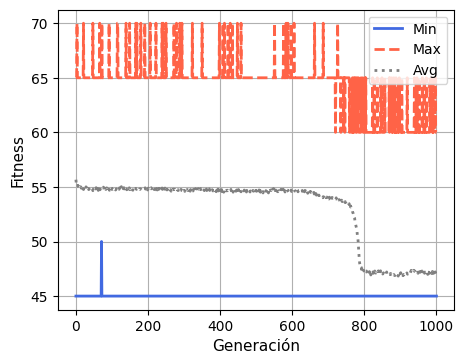

In [ ]:
plot_evolucion([logbook])

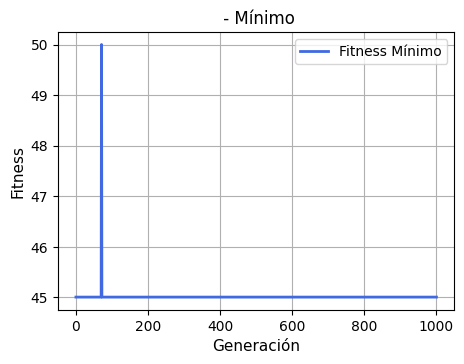

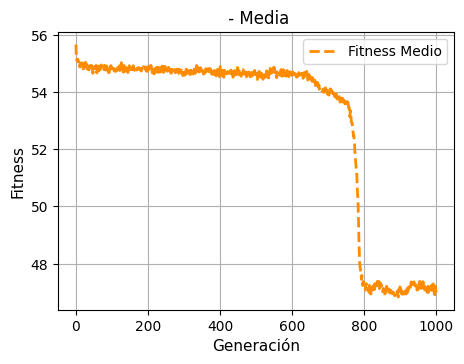

In [ ]:
plot_evolucion_doble([logbook])

**Valor de fitness de los mejores individuos**

Con el objetivo de identificar las soluciones más eficientes obtenidas por el algoritmo genético, se presenta a continuación el conjunto de individuos con mayor rendimiento según la función objetivo. Para ello, se hace uso del objeto hof (Hall of Fame), que almacena los mejores individuos generados durante el proceso evolutivo.

Esta información permite analizar tanto los valores de fitness alcanzados como la composición de los individuos que los obtuvieron. Evaluar estos resultados finales es clave para validar la calidad de la solución optimizada y comprobar si el algoritmo ha sido capaz de encontrar configuraciones cercanas al óptimo global. Además, observar la diversidad entre los mejores individuos puede aportar información sobre la robustez y la estabilidad de la solución obtenida.

In [ ]:
print("Mejor fitness: %f" %hof[0].fitness.values)
print("Mejor individuo %s" %hof[0])
print("Mejor fitness 2: %f" %hof[1].fitness.values)
print("Mejor individuo 2: %s" %hof[1])
print("Mejor fitness 3: %f" %hof[2].fitness.values)
print("Mejor individuo 3: %s" %hof[2])

Mejor fitness: 45.000000
Mejor individuo [50, 24, 53, 80, 64, 66, 11, 46, 97, 50, 34, 100, 55, 80, 61, 58, 75, 34, 15, 46, 4, 100, 95, 42]
Mejor fitness 2: 45.000000
Mejor individuo 2: [86, 57, 66, 77, 15, 66, 41, 0, 42, 2, 97, 83, 39, 84, 26, 14, 72, 57, 68, 72, 65, 36, 66, 96]
Mejor fitness 3: 45.000000
Mejor individuo 3: [75, 97, 3, 6, 90, 70, 50, 56, 84, 52, 2, 56, 55, 79, 72, 14, 52, 87, 61, 75, 77, 79, 50, 8]


**Visualización de la jugada del pentominó**


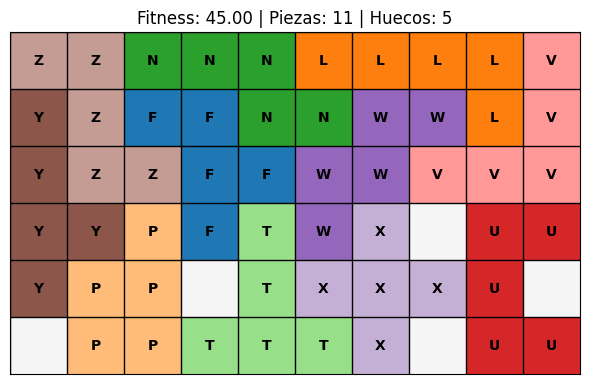

In [ ]:
mostrar_individuo(hof[0])

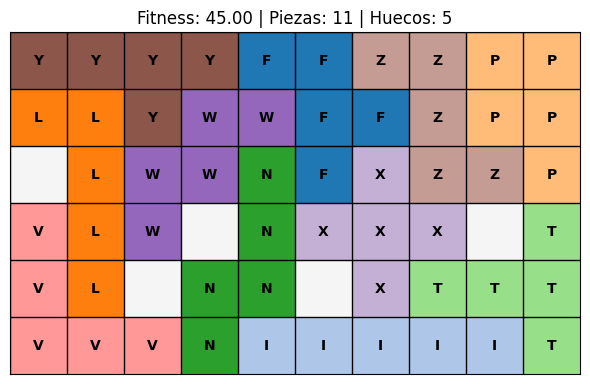

In [ ]:
mostrar_individuo(hof[1])

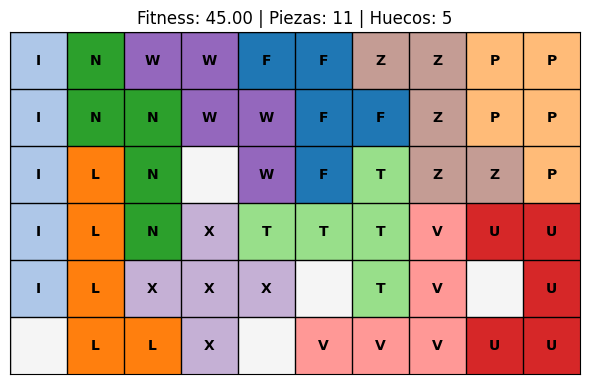

In [ ]:
mostrar_individuo(hof[2])